In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset
crop = pd.read_csv("Crop_recommendation.csv")

In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
crop.shape

(2200, 8)

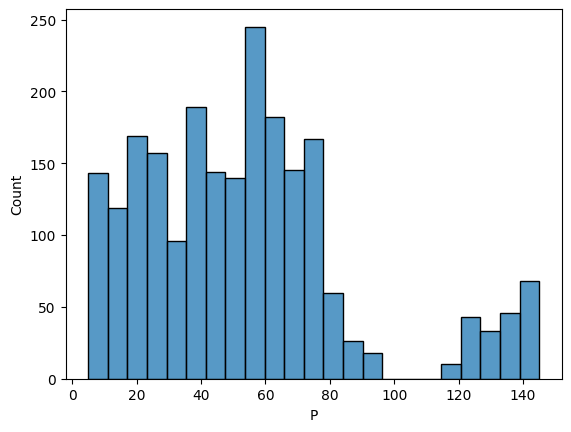

In [ ]:
import matplotlib.pyplot as plt
sns.histplot(crop['P'])
plt.show()

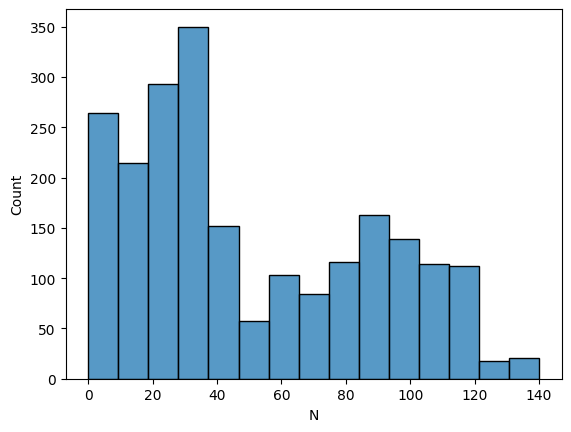

In [ ]:
import matplotlib.pyplot as plt
sns.histplot(crop['N'])
plt.show()

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:

crop.duplicated().sum()

np.int64(0)

In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
crop.columns


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
crop['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [ ]:
features = crop.columns.to_list()
features.remove('label')
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [ ]:
num_cols = crop.select_dtypes(include=[np.number])
num_cols

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
corr = num_cols.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


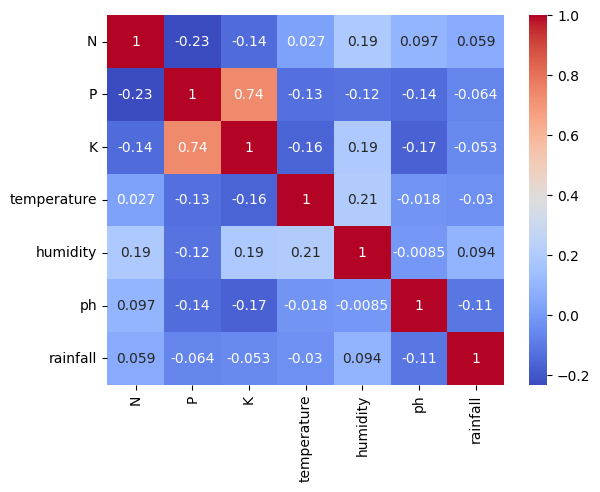

In [ ]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
crop['label'].nunique()

22

In [ ]:
crop_dict = {
'rice':1,
'maize':2,
'jute':3,
'cotton':4,
'coconut':5,
'papaya':6,
'orange':7,
'apple':8,
'muskmelon':9,
'watermelon':10,
'grapes':11,
'mango':12,
'banana':13,
'pomegranate':14,
'lentil':15,
'blackgram':16,
'mungbean':17,
'mothbeans':18,
'pigeonpeas':19,
'kidneybeans':20,
'chickpea':21,
'coffee': 22,
}

In [ ]:
crop['crop_no'] = crop['label'].map(crop_dict)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [ ]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,22


In [ ]:
crop.drop('label', axis=1, inplace=True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,22


In [ ]:
x = crop.drop('crop_no',axis=1)
y = crop['crop_no']

print(f"The shape of x is : {x.shape}")
print(f"The shape of y is : {y.shape}")

The shape of x is : (2200, 7)
The shape of y is : (2200,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (1760, 7)
Shape of y_train: (1760,)
Shape of x_test: (440, 7)
Shape of y_test: (440,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


DT = DecisionTreeClassifier()

DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:

y_pred = DT.predict(x_test)
print(f"Accuracy score of Decision Tree Classifier is: {accuracy_score(y_test,y_pred)}")

Accuracy score of Decision Tree Classifier is: 0.9886363636363636


In [ ]:
y_pred_train = DT.predict(x_train)
print(f"Accuracy score of Decision Tree Classifier is: {accuracy_score(y_train,y_pred_train)}")

Accuracy score of Decision Tree Classifier is: 1.0


In [ ]:
def crop_recommend(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    transformed_features = sc.transform(features)
    prediction = DT.predict(transformed_features).reshape(1,-1)
    crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}
    crop = [crop_dict[i] for i in prediction[0]]


    return f"{crop} is a best crop to be cultivated "

In [ ]:
N = 60
P = 43
K = 19
temperature = 20
humidity = 55
ph = 6.1
rainfall = 100

crop_recommend(N,P,K,temperature,humidity,ph,rainfall)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


"['Maize'] is a best crop to be cultivated "

In [ ]:
N = 90
P = 42
K = 43
temperature = 20
humidity = 82
ph = 6.1
rainfall = 202

crop_recommend(N,P,K,temperature,humidity,ph,rainfall)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


"['Rice'] is a best crop to be cultivated "

In [ ]:
import pickle

In [ ]:
filename='crop_recommendation.pkl'
pickle.dump(DT,open(filename,'wb'))

In [ ]:
from google.colab import files
files.download('crop_recommendation.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
load_model=pickle.load(open('crop_recommendation.pkl','rb'))

In [ ]:
load_model.score(x_test,y_test)

0.9886363636363636

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


In [ ]:
# Precision, Recall, and F1-Score for test data
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print these metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Precision: 0.9889971139971139
Recall: 0.9886363636363636
F1-Score: 0.988595068964984


In [ ]:
# Import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Predict using Decision Tree
y_pred = DT.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# ROC AUC (for multi-class classification)
y_prob = DT.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
print(f"ROC AUC: {roc_auc}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9886363636363636
Precision: 0.9889971139971139
Recall: 0.9886363636363636
F1-Score: 0.988595068964984
ROC AUC: 0.9940582926531933
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.89      0.92        19
           2       1.00      1.00      1.00        21
           3       0.92      0.96      0.94        23
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        23
          15       0.92 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [ ]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB()
}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = {}

# Loop over the models and evaluate each one
for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)  # for ROC AUC

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')

    # Store results in dictionary
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc
    }

# Print results for each model
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")


Results for Decision Tree:
Accuracy: 0.9886
Precision: 0.9890
Recall: 0.9886
F1-Score: 0.9886
ROC AUC: 0.9941


Results for Logistic Regression:
Accuracy: 0.9636
Precision: 0.9644
Recall: 0.9636
F1-Score: 0.9635
ROC AUC: 0.9993


Results for Random Forest:
Accuracy: 0.9932
Precision: 0.9937
Recall: 0.9932
F1-Score: 0.9932
ROC AUC: 0.9999


Results for K-Nearest Neighbors:
Accuracy: 0.9591
Precision: 0.9654
Recall: 0.9591
F1-Score: 0.9590
ROC AUC: 0.9937


Results for Support Vector Machine:
Accuracy: 0.9682
Precision: 0.9715
Recall: 0.9682
F1-Score: 0.9680
ROC AUC: 0.9997


Results for Naive Bayes:
Accuracy: 0.9955
Precision: 0.9958
Recall: 0.9955
F1-Score: 0.9954
ROC AUC: 1.0000




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
X = crop.drop('label', axis=1)      # Features
y = crop['label']                   # Target

# Encode crop labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_preds = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, dtc_preds)


In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)


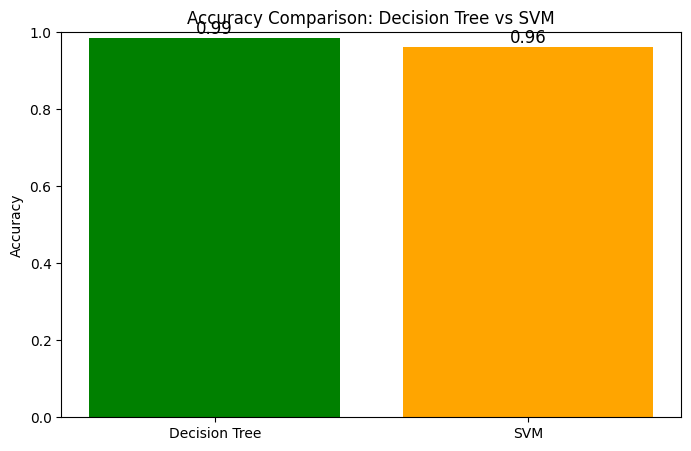

In [ ]:
models = ['Decision Tree', 'SVM']
accuracies = [dtc_acc, svm_acc]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['green', 'orange'])
plt.title('Accuracy Comparison: Decision Tree vs SVM')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12)
plt.show()


In [ ]:
print("Decision Tree Classification Report:\n")
print(classification_report(y_test, dtc_preds, target_names=le.classes_))

print("\nSVM Classification Report:\n")
print(classification_report(y_test, svm_preds, target_names=le.classes_))


Decision Tree Classification Report:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       0.93      1.00      0.97

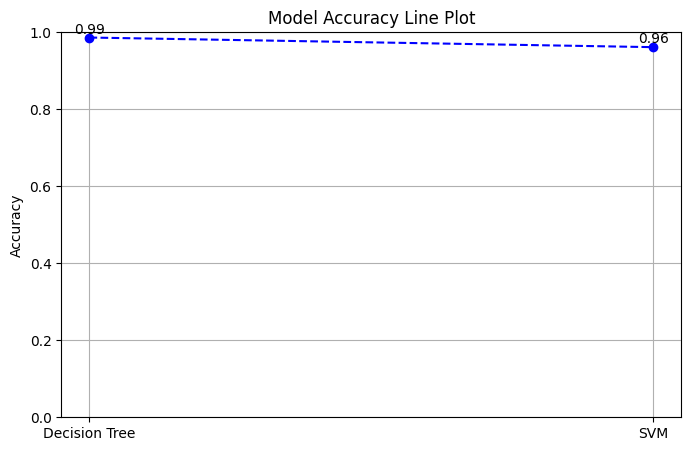

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(models, accuracies, marker='o', linestyle='--', color='blue')
plt.title('Model Accuracy Line Plot')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.grid(True)
plt.show()


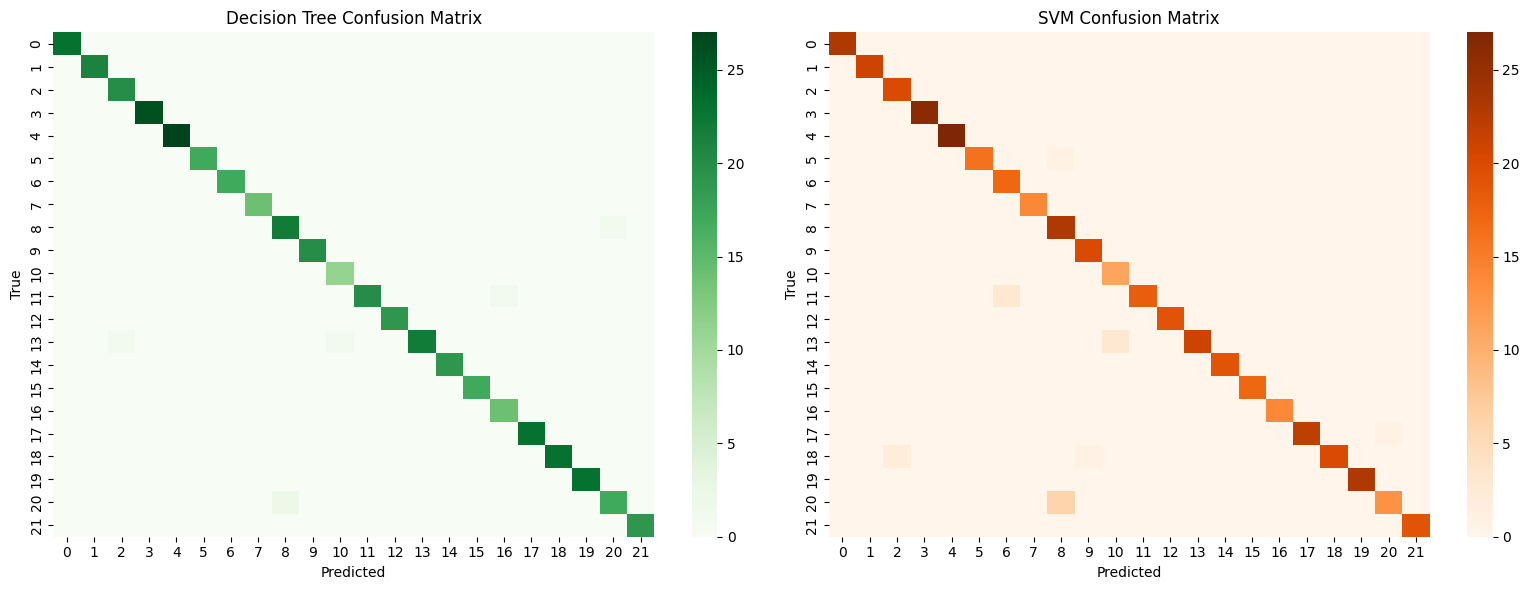

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrices
cm_dtc = confusion_matrix(y_test, dtc_preds)
cm_svm = confusion_matrix(y_test, svm_preds)

plt.figure(figsize=(16, 6))

# Decision Tree
plt.subplot(1, 2, 1)
sns.heatmap(cm_dtc, annot=False, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# SVM
plt.subplot(1, 2, 2)
sns.heatmap(cm_svm, annot=False, fmt='d', cmap='Oranges')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()


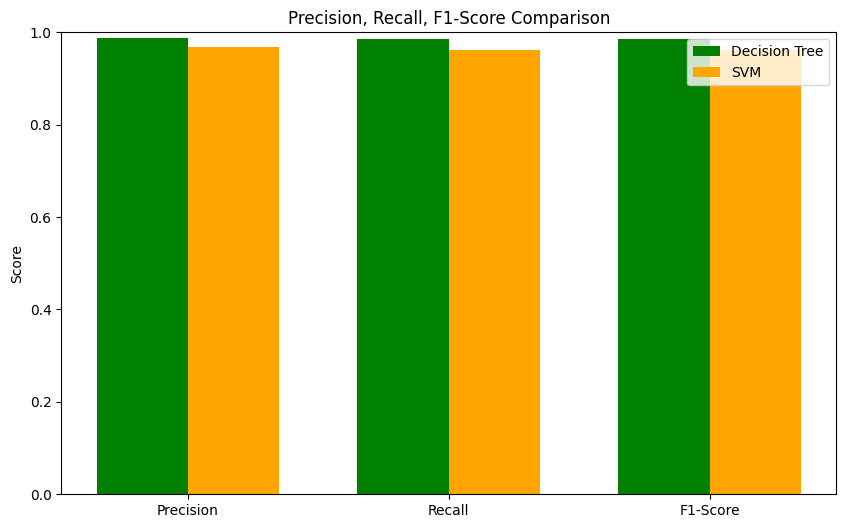

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Get average scores
precision_dtc, recall_dtc, f1_dtc, _ = precision_recall_fscore_support(y_test, dtc_preds, average='weighted')
precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, svm_preds, average='weighted')

# Prepare data
metrics = ['Precision', 'Recall', 'F1-Score']
dtc_scores = [precision_dtc, recall_dtc, f1_dtc]
svm_scores = [precision_svm, recall_svm, f1_svm]

x = np.arange(len(metrics))
width = 0.35

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, dtc_scores, width, label='Decision Tree', color='green')
plt.bar(x + width/2, svm_scores, width, label='SVM', color='orange')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Precision, Recall, F1-Score Comparison')
plt.legend()
plt.show()


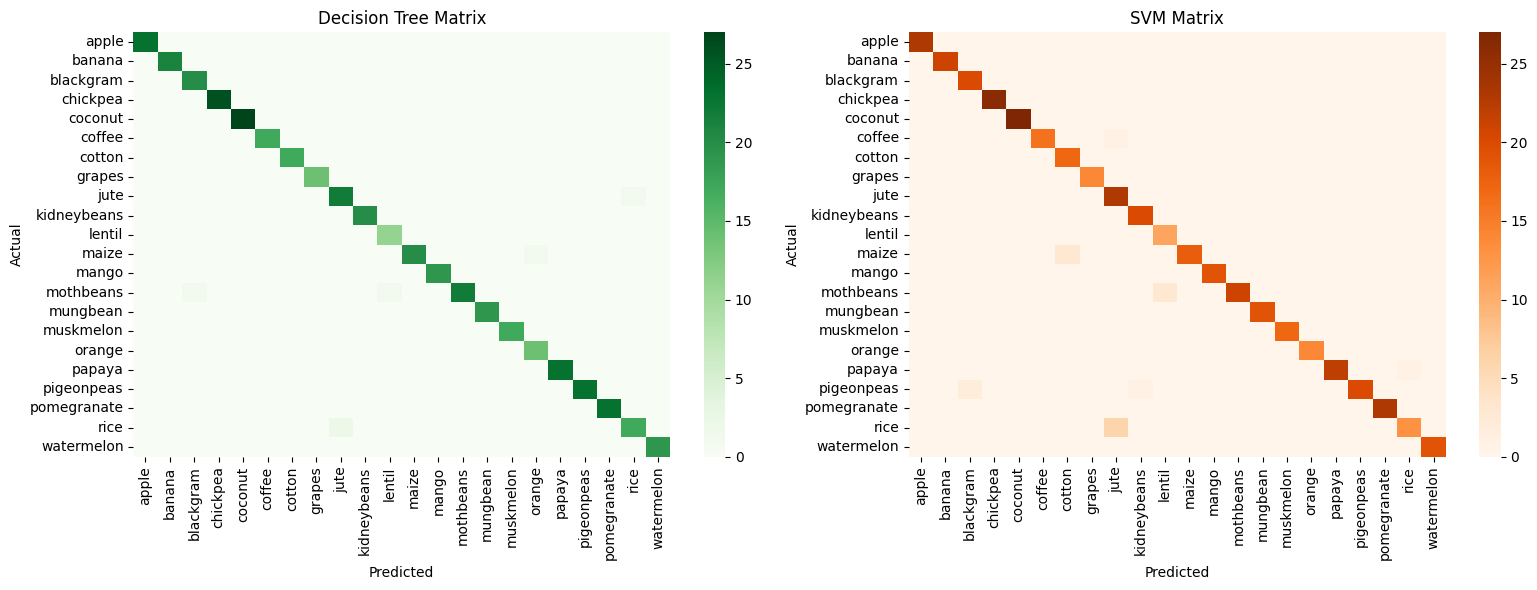

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrices
cm_dtc = confusion_matrix(y_test, dtc_preds)
cm_svm = confusion_matrix(y_test, svm_preds)

plt.figure(figsize=(16, 6))

# Heatmap for Decision Tree
plt.subplot(1, 2, 1)
sns.heatmap(cm_dtc, cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Decision Tree Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Heatmap for SVM
plt.subplot(1, 2, 2)
sns.heatmap(cm_svm, cmap="Oranges", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('SVM Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
